In [1]:
import fastf1 as ff1
from fastf1 import plotting
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.style as stl
stl.use('dark_background')

In [2]:
ff1.Cache.enable_cache('/Users/javi/Library/Caches')

In [3]:
pd.options.mode.chained_assignment = None

In [4]:
race = ff1.get_session(2022, 'Bahrain', 'R')
laps = race.load_laps(with_telemetry=True)

/usr/local/lib/python3.9/site-packages/fastf1/core.py:1093: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']


In [5]:
laps.describe()

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,LapStartTime
count,1123,1098,1123.000000,1123.000000,78,59,1101,1123,1123,1101,1123,1123,891.000000,1123.000000,1064.000000,974.000000,1077.000000,1123
mean,0 days 01:51:20.947837043,0 days 00:01:42.844193989,28.648264,2.344613,0 days 01:30:54.195243589,0 days 01:54:28.214745762,0 days 00:00:33.469308810,0 days 00:00:44.187918967,0 days 00:00:25.434068566,0 days 01:51:00.238140781,0 days 01:50:55.515479073,0 days 01:51:20.949830810,224.600449,243.087266,273.296992,286.223819,9.271123,0 days 01:49:37.808261798
std,0 days 00:28:02.533371772,0 days 00:00:09.477039205,16.323765,1.074595,0 days 00:43:52.045528653,0 days 00:21:41.946366361,0 days 00:00:05.509020511,0 days 00:00:03.661846240,0 days 00:00:03.003269927,0 days 00:27:33.187186013,0 days 00:28:01.814037878,0 days 00:28:02.531321020,19.336748,23.179172,19.113370,30.697028,4.985185,0 days 00:28:00.697349838
min,0 days 01:04:14.256000,0 days 00:01:34.570000,1.000000,1.000000,0 days 00:20:17.036000,0 days 01:20:54.774000,0 days 00:00:30.439000,0 days 00:00:40.732000,0 days 00:00:23.399000,0 days 01:04:45.838000,0 days 01:03:50.298000,0 days 01:04:14.291000,86.000000,93.000000,108.000000,101.000000,1.000000,0 days 01:02:34.872000
25%,0 days 01:27:27.986500,0 days 00:01:38.455500,15.000000,1.000000,0 days 00:39:33.474500,0 days 01:28:00.823000,0 days 00:00:31.431000,0 days 00:00:42.635000,0 days 00:00:24.215000,0 days 01:27:12.278000,0 days 01:27:00.818500,0 days 01:27:27.986500,226.000000,242.000000,274.000000,288.000000,5.000000,0 days 01:25:42.215500
50%,0 days 01:50:42.863000,0 days 00:01:39.803000,29.000000,2.000000,0 days 01:39:52.473500,0 days 01:57:24.378000,0 days 00:00:31.792000,0 days 00:00:43.293000,0 days 00:00:24.544000,0 days 01:50:29.171000,0 days 01:50:18.231000,0 days 01:50:42.863000,229.000000,249.000000,277.000000,295.000000,9.000000,0 days 01:49:03.821000
75%,0 days 02:14:19.825500,0 days 00:01:41.802000,43.000000,3.000000,0 days 02:07:12.566000,0 days 02:15:15.093500,0 days 00:00:32.211000,0 days 00:00:44.130500,0 days 00:00:24.963500,0 days 02:13:43.801000,0 days 02:13:55.490500,0 days 02:14:19.885500,232.000000,254.000000,280.000000,300.000000,13.000000,0 days 02:12:34.326500
max,0 days 02:41:12.549000,0 days 00:02:29.264000,57.000000,4.000000,0 days 02:22:20.404000,0 days 02:35:48.693000,0 days 00:01:05.178000,0 days 00:01:08.540000,0 days 00:00:49.646000,0 days 02:40:04.473000,0 days 02:40:48.001000,0 days 02:41:12.549000,240.000000,265.000000,292.000000,327.000000,24.000000,0 days 02:39:31.369000


In [6]:
laps.loc[laps['LapTime'] == min(laps['LapTime'].dropna())]

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
50,0 days 02:30:35.690000,16,0 days 00:01:34.570000,51,4,NaT,NaT,0 days 00:00:30.439000,0 days 00:00:40.732000,0 days 00:00:23.399000,...,297.0,SOFT,8.0,False,0 days 02:29:01.120000,Ferrari,LEC,1,False,2022-03-20 16:30:01.137


In [7]:
laps['Compound'].value_counts()

SOFT       674
MEDIUM     345
HARD       103
UNKNOWN      1
Name: Compound, dtype: int64

In [8]:
laps2 = laps.loc[laps['IsAccurate'] == True]

In [14]:
type(laps)

fastf1.core.Laps

In [9]:
df = laps2[['Team', 'Driver', 'LapTime']].groupby(['Team', 'Driver']).mean().sort_values(['Team', 'LapTime'])
df

LapTime
Team            Driver                          
Alfa Romeo      BOT       0 days 00:01:39.413200
                ZHO    0 days 00:01:39.500466666
AlphaTauri      TSU    0 days 00:01:39.439590909
                GAS    0 days 00:01:39.527692307
Alpine          OCO    0 days 00:01:39.302186046
                ALO    0 days 00:01:39.548162790
Aston Martin    STR    0 days 00:01:40.403931818
                HUL    0 days 00:01:40.977022727
Ferrari         LEC    0 days 00:01:37.638304347
                SAI    0 days 00:01:38.024113636
Haas F1 Team    MAG    0 days 00:01:39.101066666
                MSC    0 days 00:01:40.119266666
McLaren         RIC    0 days 00:01:40.584931818
                NOR    0 days 00:01:40.870340909
Mercedes        HAM    0 days 00:01:38.319727272
                RUS    0 days 00:01:38.676777777
Red Bull Racing VER       0 days 00:01:37.907325
                PER    0 days 00:01:38.160634146
Williams        ALB    0 days 00:01:40.593613636
                LAT    0 days 00:01:40.974325581

In [10]:
laps3 = laps2[['LapTime', 'LapNumber', 'Stint', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']]

In [11]:
laps3

,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
1,0 days 00:01:37.853000,2,1,0 days 00:00:31.582000,0 days 00:00:42.159000,0 days 00:00:24.112000,226.0,250.0,273.0,284.0
2,0 days 00:01:38.272000,3,1,0 days 00:00:31.635000,0 days 00:00:42.404000,0 days 00:00:24.233000,227.0,252.0,273.0,289.0
3,0 days 00:01:38.414000,4,1,0 days 00:00:31.619000,0 days 00:00:42.482000,0 days 00:00:24.313000,228.0,250.0,273.0,290.0
4,0 days 00:01:38.471000,5,1,0 days 00:00:31.590000,0 days 00:00:42.565000,0 days 00:00:24.316000,229.0,253.0,273.0,289.0
5,0 days 00:01:38.712000,6,1,0 days 00:00:31.627000,0 days 00:00:42.652000,0 days 00:00:24.433000,228.0,252.0,273.0,290.0
...,...,...,...,...,...,...,...,...,...,...
1118,0 days 00:01:38.204000,40,3,0 days 00:00:31.492000,0 days 00:00:42.613000,0 days 00:00:24.099000,231.0,253.0,277.0,NaN
1119,0 days 00:01:38.301000,41,3,0 days 00:00:31.523000,0 days 00:00:42.621000,0 days 00:00:24.157000,232.0,248.0,277.0,299.0
1120,0 days 00:01:38.329000,42,3,0 days 00:00:31.453000,0 days 00:00:42.692000,0 days 00:00:24.184000,231.0,251.0,277.0,297.0
1121,0 days 00:01:38.478000,43,3,0 days 00:00:31.468000,0 days 00:00:42.816000,0 days 00:00:24.194000,232.0,250.0,276.0,296.0


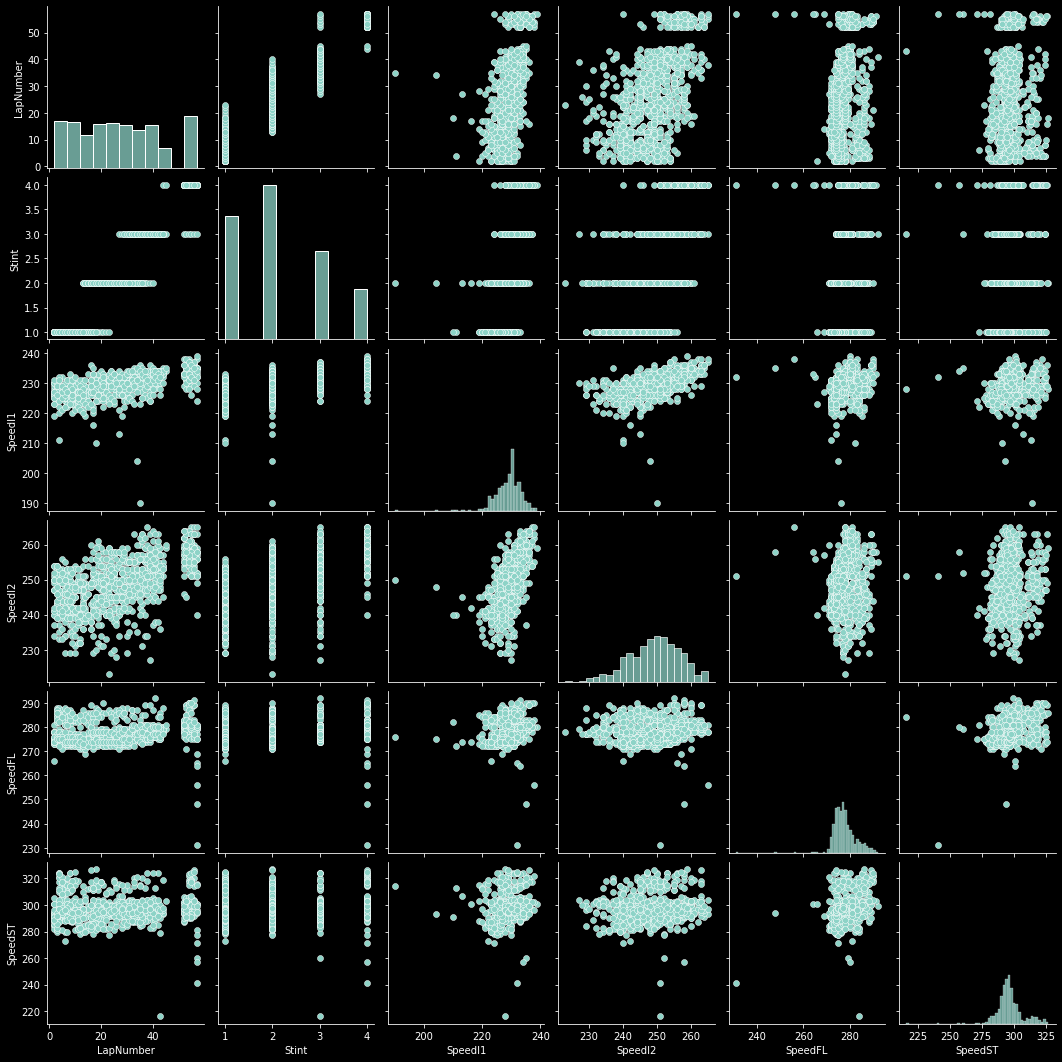

In [12]:
sns.pairplot(laps3)